In [1]:
# Load all packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

### Load the data

In [2]:
hotel = pd.read_csv('D:\Jupyter_Notebook\Hotel_Demand\data\hotel_featured.csv')

In [3]:
hotel.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,...,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,0,0,2,0,0,0,3,0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,0,0,2,0,0,0,4,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,14,0,2,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [4]:
hotel.shape

(119208, 68)

### Split data into training and testing subsets

In [5]:
X = hotel.drop(columns=['is_canceled'])
y = hotel['is_canceled']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [7]:
# Use MinMaxScaler to scale data into range (0,1), not using StandardScale here because many columns should not contain negative values
from sklearn import preprocessing
import numpy as np

scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train=scaler.transform(X_train) 
X_train = pd.DataFrame(X_train,columns=X.columns)

X_test=scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns=X.columns)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(95366, 67)
(23842, 67)
(95366,)
(23842,)


### Modeling

In [9]:
clf = LogisticRegression(random_state = 1)
# Fit the model on the trainng data.
clf.fit(X_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# Print the accuracy from the testing data.
print(accuracy_score(y_test, clf.predict(X_test)))

0.8016525459273551


In this project, we would like to predict if an order would be canceled or not. So we are interested in the True Positives, we would preciously predict the True Positive for actually cancelling the order. Precision should be the metric to focus on.

In [11]:
from sklearn.metrics import precision_score,recall_score
print(precision_score(y_test, clf.predict(X_test)))

0.7911978350662299


In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(X_test))
cm

array([[13558,  1466],
       [ 3263,  5555]], dtype=int64)

### PCA
The result of the prediction is not so well. Try to use PCA to reduce dimensions and redo the mdoeling. 

Text(0.5, 0, 'PCA feature')

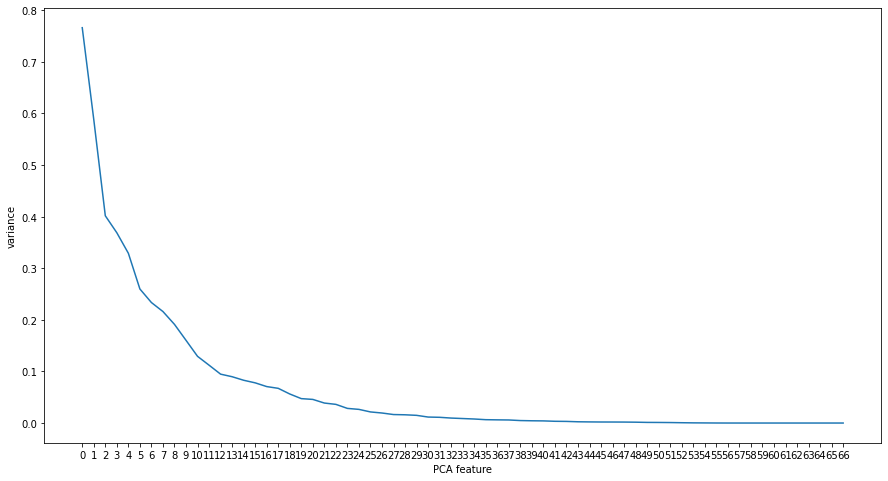

In [13]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

features = range(pca.n_components_)
fig= plt.figure(figsize=(15,8))
plt.plot(features,pca.explained_variance_)
plt.rc('xtick', labelsize=5)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')

# 12 components looks like a good choice.

In [14]:
pca = PCA(n_components = 12)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

#cols= ['PC-' + str(i + 1) for i in range(X_train.shape[1])]
#X_train = pd.DataFrame(X_train, columns = cols)
#X_test = pd.DataFrame(X_test, columns = cols)

In [15]:
clf = LogisticRegression(random_state = 1)
# Fit the model on the trainng data.
clf.fit(X_train_pca, y_train)
# Print the accuracy from the testing data.
print('accuracy_score: ', accuracy_score(y_test, clf.predict(X_test_pca)))
print('precision_score: ', precision_score(y_test, clf.predict(X_test_pca)))

cm = confusion_matrix(y_test, clf.predict(X_test_pca))
print(cm)

accuracy_score:  0.7506920560355674
precision_score:  0.7603260869565217
[[13701  1323]
 [ 4621  4197]]


### Tunning the Model

Tune the model without pca

In [16]:
Cs = [0.001, 0.1, 1, 10, 100]

param_grid = {'C':Cs}
clf = LogisticRegression()
clf_cv = GridSearchCV(clf,param_grid,scoring='precision',cv=5)
clf_cv.fit(X_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

In [17]:
clf_cv.best_score_

0.8535505684357304

In [18]:
print(clf_cv.best_params_)
print(accuracy_score(y_test, clf_cv.predict(X_test)))
print('precision_score: ', precision_score(y_test, clf_cv.predict(X_test)))

{'C': 0.001}
0.7615132958644409
precision_score:  0.8392547660311959


Tune the model with pca

In [151]:
Cs = [0.001, 0.1, 1, 10, 100]

param_grid = {'C':Cs}
clf = LogisticRegression()
clf_cv_pca = GridSearchCV(clf,param_grid,scoring='precision',cv=5)
clf_cv_pca.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

In [152]:
print(clf_cv_pca.best_params_)
print(accuracy_score(y_test, clf_cv_pca.predict(X_test_pca)))
print('precision_score: ', precision_score(y_test, clf_cv_pca.predict(X_test_pca)))

{'C': 0.001}
0.7449458938008556
precision_score:  0.7992565055762082


### Logistic Regression Final Model and Analysis

From the previous analysis, the mdoels without pca perform better. By tuning the hyperparameter, I found the learning rate=0.001 gives the highest precision score. Amount all the positive prediction, 84% of them are correct.

In [192]:
clf = LogisticRegression(C=0.001, random_state = 1)
# Fit the model on the trainng data.
clf.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(accuracy_score(y_test, clf.predict(X_test)))
print(precision_score(y_test, clf.predict(X_test)))
cm = confusion_matrix(y_test, clf.predict(X_test))
print(cm)

0.7615132958644409
0.8392547660311959
[[14282   742]
 [ 4944  3874]]


Confusion matrix, without normalization
[[14282   742]
 [ 4944  3874]]
Normalized confusion matrix
[[0.95 0.05]
 [0.56 0.44]]


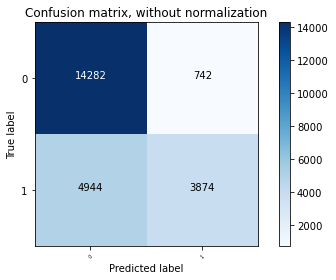

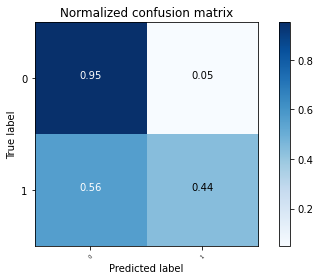

In [193]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, clf.predict(X_test))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

Check the coefficient, and find which features have the most positive or negative effect on cancellation.

In [194]:
# get importance
importance = clf.coef_[0]
feature = pd.DataFrame(importance,index=X_train.columns,columns=['importance'])

In [195]:
# find features has positive impact on cancellation
feature.sort_values('importance',ascending=False).head()

,importance
deposit_type_Non Refund,1.075658
lead_time,0.742223
assigned_room_type_A,0.538979
market_segment_Online TA,0.392140
customer_type_Transient,0.371260


In [196]:
# find features has negaitve impact on cancellation
feature.sort_values('importance',ascending=True).head()

,importance
deposit_type_No Deposit,-1.056359
total_of_special_requests,-0.816791
country_5,-0.525161
required_car_parking_spaces,-0.447823
country_6,-0.439166


Deposit type seems odd in this analysis. If an order is non-refundable, it increase the chance of cancellation. If an order takes no deposit, it decreases the chance of cancellation. 

### Conclusion

This Logistic Regression model does not perform so well. This model only correctly identifies 44% of cancellation. And 84% of the positive prediction is correct. Both of the True positive rate and the precision is not high enough. Compared to the other two models, Logistic Regression is not a good choice for this problem. 